# Information Retrival System

A word2vec based information retrival system created on the crainfield dataset consisting of 1400 documents and 255 queries. The model can be used on any dataset by changing the dataset being loaded at the start of the notebook and changing the dataset for evalution in the Evaluation and Plotting section of the notebook.

## Python packages used:
- numpy
- pandas
- json
- tqdm
- warnings
- nltk
- pickle
- autocorrect
- spacy
- sklearn
- matplotlib

## Notebook Architecture:
- Preprocessing documents and queries
- Word Similarity Calculations
- TF-IDF Calculations
- Ranking Documents
- Evaluation and Plotting

In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import json
from tqdm.auto import tqdm
import warnings
import nltk
import pickle

warnings.filterwarnings("ignore")
#Install any library by doing !pip install <library name>
!pip install autocorrect

#Run this after your download nltk
nltk.download('all')

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package cess_cat is already up-

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     /Users/Abhimanyu/nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     /Users/Ab

True

In [2]:
# Reading documents
docs_json = json.load(open("cranfield/cran_docs.json", 'r'))[:]
docIDs, docs = [item["id"] for item in docs_json], \
                    [item["body"] for item in docs_json]
queries_json = json.load(open("cranfield/cran_queries.json", 'r'))[:]
docs[0]

'experimental investigation of the aerodynamics of a wing in a slipstream .   an experimental study of a wing in a propeller slipstream was made in order to determine the spanwise distribution of the lift increase due to slipstream at different angles of attack of the wing and at different free stream to slipstream velocity ratios .  the results were intended in part as an evaluation basis for different theoretical treatments of this problem .   the comparative span loading curves, together with supporting evidence, showed that a substantial part of the lift increment produced by the slipstream was due to a /destalling/ or boundary-layer-control effect .  the integrated remaining lift increment, after subtracting this destalling lift, was found to agree well with a potential flow theory .   an empirical evaluation of the destalling effects was made for the specific configuration of the experiment .'

# Preprocessing documents and queries

Preprocessing follows the following architecture.
- Sentence Segmentation
- Tokenization
- Spell Check
- Lemmetization
- Stopword Removal

The block of code for pre-processing has been commented below and already pre-processed documents are loaded to save execution time. The commented section can be uncommented if the user wants to preprocess documents from scratch. However, the preprocess for docs (1400 documents) takes about 15 mins (due to spell check) and queries (255 queries) take about a minute. To run this block faster without using the presaved data, the spell check could be commented out.

In [3]:
# # Preprocess Docs
# import nltk
# from nltk import sent_tokenize
# from nltk.tokenize import TreebankWordTokenizer
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# from autocorrect import Speller
# spell = Speller()
# list_of_words = stopwords.words('english')
# list_of_words.append('.')
# list_of_words.append('!')
# list_of_words.append('?')
# list_of_words.append(',')

# segmented_docs=[]
# for doc in tqdm(docs):
#     segmentedText = None
#     segmentedText = sent_tokenize(doc)
#     segmented_docs.append(segmentedText)

# tokenizedText = []
# for text in tqdm(segmented_docs):
#     temp = []
#     for j in range(len(text)):
#         text[j] = spell(text[j]) #spell check
#         temp.append(TreebankWordTokenizer().tokenize(text[j]))
#     tokenizedText.append(temp)

# lemmatizer = WordNetLemmatizer()
# reduced_docs = []
# for d in tqdm(tokenizedText):
#     temp = []
#     for s in d:
#         temp2 = []
#         for w in s:
#             temp2.append(lemmatizer.lemmatize(w))
#         temp.append(temp2)
#     reduced_docs.append(temp)



# stopwords_removed = []
# for d in tqdm(reduced_docs):
#     temp = []
#     for s in d:
#         temp2 = []
#         for w in s:
#             if w not in list_of_words: 
#                 temp2.append(w)
#         temp.append(temp2)
#     stopwords_removed.append(temp)

# preprocessedDocs = stopwords_removed

open_file = open('preprocessedDocs.pkl', "rb")
preprocessedDocs = pickle.load(open_file)
open_file.close()

rearranged_docs = []
for d in preprocessedDocs:
    temp = ''
    for i in range(len(d)):
        s = d[i]
        for j in range(len(s)):
            w = s[j]
            if i == len(d)-1 and j == len(s)-1:
                temp += w
            else:
                temp += w+' '
    rearranged_docs.append(temp)
len(rearranged_docs)

1400

In [4]:
#Creating bigram documents
bigram_docs = []
for d in preprocessedDocs:
    temp = ''
    for j in range(len(d)):
        s=d[j]
        for i in range(1,len(s)):
            w1 = s[i-1]
            w2 = s[i]
            bi_w = w1+'_'+w2
            if i == len(d)-1 and j == len(s)-1:
                temp += bi_w
            else:
                temp += bi_w+' '
    bigram_docs.append(temp)
bigram_docs[0]

'experimental_investigation investigation_aerodynamics aerodynamics_wing wing_slipstream experimental_study study_wing wing_propeller propeller_slipstream slipstream_wa wa_made made_order order_determine determine_spanish spanish_distribution distribution_lift lift_increase increase_due due_slipstream slipstream_different different_angle angle_attack attack_wing wing_different different_free free_stream stream_slipstream slipstream_velocity velocity_ratio result_intended intended_part part_evaluation evaluation_basis basis_different different_theoretical theoretical_treatment treatment_problem comparative_span span_loading loading_curve curve_together together_supporting supporting_evidence evidence_showed showed_substantial substantial_part part_lift lift_increment increment_produced produced_slipstream slipstream_wa wa_due due_/detailing/ /detailing/_boundary-layer-control boundary-layer-control_effect integrated_remaining remaining_lift lift_increment increment_subtraction subtracti

In [5]:
#Unigram+Bigram docs
for i in tqdm(range(len(bigram_docs))):
    bigram_docs[i] = rearranged_docs[i]+' '+bigram_docs[i]
bigram_docs[0]

'experimental investigation aerodynamics wing slipstream experimental study wing propeller slipstream wa made order determine spanish distribution lift increase due slipstream different angle attack wing different free stream slipstream velocity ratio result intended part evaluation basis different theoretical treatment problem comparative span loading curve together supporting evidence showed substantial part lift increment produced slipstream wa due /detailing/ boundary-layer-control effect integrated remaining lift increment subtraction detailing lift wa found agree well potential flow theory empirical evaluation detailing effect wa made specific configuration experiment experimental_investigation investigation_aerodynamics aerodynamics_wing wing_slipstream experimental_study study_wing wing_propeller propeller_slipstream slipstream_wa wa_made made_order order_determine determine_spanish spanish_distribution distribution_lift lift_increase increase_due due_slipstream slipstream_diff

In [6]:
# #Preprocessing Queries
# queries_df = pd.DataFrame(np.zeros((len(queries_json),2)),
#                           columns = ['ID','query'])
# queries = []
# for i in tqdm(range(len(queries_df))):
#     queries_df['query'].iloc[i] = queries_json[i]['query']
#     queries_df['ID'].iloc[i] = queries_json[i]['query number']
#     queries.append(queries_json[i]['query'])
# queries

# preprocessedQueries = []
# for query in tqdm(queries):
#     query = spell(query) #Spell check
#     tokenized_query = TreebankWordTokenizer().tokenize(query)
#     temp = []
#     for w in tokenized_query:
#         temp.append(lemmatizer.lemmatize(w))
#     reduced_query = temp
#     temp2 = []
#     for w in reduced_query:
#         if w not in list_of_words: 
#             temp2.append(w)
#     stopwords_removed_query = temp2
#     preprocessedQueries.append(temp2)

# spell = Speller()
# for i in tqdm(range(len(preprocessedQueries))):
#     s = preprocessedQueries[i]
#     temp3 = ''
#     for j in range(len(s)):
#         w = s[j]
#         if j == len(s)-1:
#             temp3 += w
#         else:
#             temp3 += w+' '
#     preprocessedQueries[i] = temp3

# preprocessedQueries

open_file = open('preprocessedQueries.pkl', "rb")
preprocessedQueries = pickle.load(open_file)
open_file.close()
preprocessedQueries

['similarity law must obeyed constructing aeroelastic model heated high speed aircraft',
 'structural aeroelastic problem associated flight high speed aircraft',
 'problem heat conduction composite slab solved far',
 'criterion developed show empirically validity flow solution chemically reacting gas mixture based simplifying assumption instantaneous local chemical equilibrium',
 'chemical kinetic system applicable hyperbolic aerodynamic problem',
 'theoretical experimental guide turbulent corvette flow behaviour',
 'possible relate available pressure distribution give somebody zero angle attack lower surface pressure equivalent give somebody angle attack',
 'method -dash exact approximate -dash presently available predicting body pressure angle attack',
 'paper internal /slip flow/ heat transfer study',
 'real-gas transport property air available wide range enthalpy density',
 'possible find analytical similar solution strong blast wave problem newtonian approximation',
 'aerodynamic 

In [7]:
#Computing bigrams for queries
from nltk.tokenize import TreebankWordTokenizer
bigram_queries = []
for q in preprocessedQueries:
    temp1 = TreebankWordTokenizer().tokenize(q)
    temp2 = ''
    for i in range(1,len(temp1)):
        w1 = temp1[i-1]
        w2 = temp1[i]
        bi_w = w1+'_'+w2
        if i == len(temp1)-1:
            temp2 += bi_w
        else:
            temp2 += bi_w+' '
    bigram_queries.append(temp2)
bigram_queries

['similarity_law law_must must_obeyed obeyed_constructing constructing_aeroelastic aeroelastic_model model_heated heated_high high_speed speed_aircraft',
 'structural_aeroelastic aeroelastic_problem problem_associated associated_flight flight_high high_speed speed_aircraft',
 'problem_heat heat_conduction conduction_composite composite_slab slab_solved solved_far',
 'criterion_developed developed_show show_empirically empirically_validity validity_flow flow_solution solution_chemically chemically_reacting reacting_gas gas_mixture mixture_based based_simplifying simplifying_assumption assumption_instantaneous instantaneous_local local_chemical chemical_equilibrium',
 'chemical_kinetic kinetic_system system_applicable applicable_hyperbolic hyperbolic_aerodynamic aerodynamic_problem',
 'theoretical_experimental experimental_guide guide_turbulent turbulent_corvette corvette_flow flow_behaviour',
 'possible_relate relate_available available_pressure pressure_distribution distribution_give g

In [8]:
for i in tqdm(range(len(bigram_queries))):
    bigram_queries[i] = preprocessedQueries[i]+' '+bigram_queries[i]
bigram_queries[0]

'similarity law must obeyed constructing aeroelastic model heated high speed aircraft similarity_law law_must must_obeyed obeyed_constructing constructing_aeroelastic aeroelastic_model model_heated heated_high high_speed speed_aircraft'

# Word Similarity Calculations

The commented block of code calculates the similarity between words (pairwise). The similarity between words has been calculated in advance and is being read from a CSV file. The similairty file is being thresholded at 0.7, in other words the similarity between a pair of words is only being considered if its greater thatn 0.7.

In [9]:
!pip install spacy
!python -m spacy download en_core_web_lg
import spacy
import en_core_web_lg
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(use_idf=True)
vectorizer.fit_transform(rearranged_docs)
unique_words = vectorizer.get_feature_names()

nlp = en_core_web_lg.load()

a = []
for i in tqdm(range(len(unique_words))):
    a.append(nlp(unique_words[i]))
a

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


[00,
 000,
 0001,
 0005,
 000degree,
 000k,
 001,
 002,
 003,
 004,
 00675,
 008,
 01,
 010,
 012,
 013,
 014,
 02,
 02025,
 025,
 028,
 03,
 04,
 05,
 06,
 064,
 066,
 07,
 08,
 09,
 0904,
 0degree,
 0degrees,
 10,
 100,
 1000,
 100degrees,
 100x10,
 101,
 104,
 1081,
 109,
 10degree,
 10degrees,
 10g,
 11,
 110,
 1103,
 1103a,
 111,
 113,
 1135,
 117,
 11in,
 12,
 120,
 1211,
 124,
 125,
 1250,
 12degree,
 13,
 130,
 1300,
 14,
 140,
 1400,
 1400degree,
 142,
 1428,
 1460,
 14in,
 14x10,
 15,
 150,
 1500,
 153,
 15degree,
 15x10,
 15x106,
 16,
 165,
 17,
 170,
 1730,
 18,
 180,
 180degree,
 182,
 1856,
 1869,
 1873,
 1875,
 18degree,
 18in,
 19,
 190,
 1909,
 1910,
 1912,
 1914,
 1916,
 1917,
 1921,
 1925,
 1932,
 1933,
 1934,
 1936,
 1938,
 1939,
 1941,
 1943,
 1944,
 1945,
 1947,
 1948,
 1950,
 1951,
 1953,
 1956,
 1957,
 1958,
 1959,
 195e,
 1960,
 1961,
 1962,
 199,
 1degree,
 1f,
 1x10,
 20,
 200,
 2000,
 200degree,
 2024,
 20degree,
 20degrees,
 21,
 210,
 211,
 21153,
 215,
 2

In [10]:
# sim_mat = pd.DataFrame(np.zeros((len(unique_words),len(unique_words))),columns=unique_words,index=unique_words)
# for i in tqdm(range(len(a))):
#     for j in range(i):
#         sim_mat.iloc[i,j] = a[i].similarity(a[j])

# sim_mat.to_csv('sim_mat.csv',index=False)
# sim_mat

In [11]:
a = pd.read_csv('sim_mat.csv')
a.index = a.columns
sim_mat = a+a.T
sim_mat[sim_mat<0.7] = 0
for i in tqdm(range(sim_mat.shape[0])):
    sim_mat.iloc[i,i] = 1
sim_mat

,00,000,0001,0005,000degree,000k,001,002,003,004,...,yuan,yy,zakkay,zam,zbrozek,zero,zhukhovitskii,zone,zoom,zurich
00,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001,0.0,0.0,1.000000,0.725442,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005,0.0,0.0,0.725442,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000degree,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
zhukhovitskii,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
zone,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
zoom,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# TF-IDF Calculations

This section consists of 8 different tf-idf calculation for different types of models used. The comment on top of each block describes the model in the most crude sense.

In [12]:
#Calculate tf-idf for unigram docs
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(rearranged_docs)
df = pd.DataFrame(X[:].todense(), columns = vectorizer.get_feature_names())
unique_words = vectorizer.get_feature_names()
df


,00,000,0001,0005,000degree,000k,001,002,003,004,...,yuan,yy,zakkay,zam,zbrozek,zero,zhukhovitskii,zone,zoom,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.09538,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [13]:
#tf-idf for unigram queries
q_tfidf = pd.DataFrame(vectorizer.transform(preprocessedQueries).todense(),
                       columns = vectorizer.get_feature_names())

q_tfidf

,00,000,0001,0005,000degree,000k,001,002,003,004,...,yuan,yy,zakkay,zam,zbrozek,zero,zhukhovitskii,zone,zoom,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#TF-IDF of unigram+bigrams documents
vectorizer_bigram = TfidfVectorizer(use_idf=True)
X_bigram = vectorizer_bigram.fit_transform(bigram_docs)
df_bigram = pd.DataFrame(X_bigram[:].todense(), columns = vectorizer_bigram.get_feature_names())
unique_words_bigram = vectorizer_bigram.get_feature_names()
df_bigram

,00,000,0001,0001_100,0001_found,0005,0005_0,000_12,000_120,000_17,...,zone_presented,zone_separation,zone_shown,zone_two,zone_velocity,zoom,zoom_climb,zurich,zurich_1916,zurich_1960
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Computing tfidf for bigram queries
q_tfidf_bigram = pd.DataFrame(vectorizer_bigram.transform(bigram_queries).todense(),
                       columns = vectorizer_bigram.get_feature_names())
q_tfidf_bigram

,00,000,0001,0001_100,0001_found,0005,0005_0,000_12,000_120,000_17,...,zone_presented,zone_separation,zone_shown,zone_two,zone_velocity,zoom,zoom_climb,zurich,zurich_1916,zurich_1960
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Computing the tfidf values while considering the word similarity for unigrams 
new_tfidf = pd.DataFrame(np.zeros((q_tfidf.shape[0],q_tfidf.shape[1])),columns=q_tfidf.columns)
for i in tqdm(range(q_tfidf.shape[0])):
    for j in range(q_tfidf.shape[1]):
        if q_tfidf.iloc[i,j]!=0:
            new_tfidf.iloc[i,:]+=q_tfidf.iloc[i,j]*sim_mat[q_tfidf.columns[j]]

#clipping the values
new_tfidf[new_tfidf < 10e-4] = 0
new_tfidf

,00,000,0001,0005,000degree,000k,001,002,003,004,...,yuan,yy,zakkay,zam,zbrozek,zero,zhukhovitskii,zone,zoom,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Computing tfidf values while considering word simialrity for unigram+bigram queries
#Word similarities are only for unigrams present in the model
new_tfidf_bigram = pd.DataFrame(np.zeros((q_tfidf_bigram.shape[0],q_tfidf_bigram.shape[1])),columns=q_tfidf_bigram.columns)

for j in tqdm(range(new_tfidf_bigram.shape[1])):
    w = new_tfidf_bigram.columns[j]
    if w in new_tfidf.columns:
        new_tfidf_bigram.loc[:,w] = new_tfidf.loc[:,w]
            

#clipping the values
# new_tfidf_bigram[new_tfidf < 10e-4] = 0
new_tfidf_bigram

,00,000,0001,0001_100,0001_found,0005,0005_0,000_12,000_120,000_17,...,zone_presented,zone_separation,zone_shown,zone_two,zone_velocity,zoom,zoom_climb,zurich,zurich_1916,zurich_1960
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Unigram+Bigrams document tfidf using sklearn
vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))
X = vectorizer.fit_transform(rearranged_docs)
bigram_package = pd.DataFrame(X[:].todense(), columns = vectorizer.get_feature_names())
bigram_package

,00,00 28,00 85,00 aerodynamic,00 condition,00 interval,00 maximum,00 time,00 wall,000,...,zone separation,zone shown,zone theory,zone two,zone velocity,zoom,zoom climb,zurich,zurich 1916,zurich 1960
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#tf-idf matrix for queries (unigram+bigrams) using sklearn
q_tfidf_bigram_package = pd.DataFrame(vectorizer.transform(preprocessedQueries).todense(),
                       columns = vectorizer.get_feature_names())

q_tfidf_bigram_package

,00,00 28,00 85,00 aerodynamic,00 condition,00 interval,00 maximum,00 time,00 wall,000,...,zone separation,zone shown,zone theory,zone two,zone velocity,zoom,zoom climb,zurich,zurich 1916,zurich 1960
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Unigram+Bigram+Trigrams document tfidf using sklearn
vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
X = vectorizer.fit_transform(rearranged_docs)
trigram_package = pd.DataFrame(X[:].todense(), columns = vectorizer.get_feature_names())
trigram_package

,00,00 28,00 28 fitness,00 85,00 85 thrust,00 aerodynamic,00 aerodynamic stiffness,00 condition,00 condition calculation,00 interval,...,zone velocity distribution,zoom,zoom climb,zoom climb maneuvering,zoom climb technique,zurich,zurich 1916,zurich 1916 method,zurich 1960,zurich 1960 suitable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#tf-idf matrix for queries (unigram+bigrams+trigrams) using sklearn
q_tfidf_trigram = pd.DataFrame(vectorizer.transform(preprocessedQueries).todense(),
                       columns = vectorizer.get_feature_names())

q_tfidf_trigram

,00,00 28,00 28 fitness,00 85,00 85 thrust,00 aerodynamic,00 aerodynamic stiffness,00 condition,00 condition calculation,00 interval,...,zone velocity distribution,zoom,zoom climb,zoom climb maneuvering,zoom climb technique,zurich,zurich 1916,zurich 1916 method,zurich 1960,zurich 1960 suitable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Computing tfidf values while considering word simialrity for unigram+bigram queries (sklearn)
#Word similarities are only for unigrams present in the model
new_tfidf_bigram_package_w_sim = pd.DataFrame(np.zeros((q_tfidf_bigram_package.shape[0],q_tfidf_bigram_package.shape[1])),columns=q_tfidf_bigram_package.columns)

for j in tqdm(range(new_tfidf_bigram_package_w_sim.shape[1])):
    w = new_tfidf_bigram_package_w_sim.columns[j]
    if w in new_tfidf.columns:
        new_tfidf_bigram_package_w_sim.loc[:,w] = new_tfidf.loc[:,w]
            

#clipping the values
# new_tfidf_bigram[new_tfidf < 10e-4] = 0
new_tfidf_bigram_package_w_sim


,00,00 28,00 85,00 aerodynamic,00 condition,00 interval,00 maximum,00 time,00 wall,000,...,zone separation,zone shown,zone theory,zone two,zone velocity,zoom,zoom climb,zurich,zurich 1916,zurich 1960
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Computing tfidf values while considering word simialrity for unigram+bigram+trigram queries (sklearn)
#Word similarities are only for unigrams present in the model
new_tfidf_trigram_package_w_sim = pd.DataFrame(np.zeros((q_tfidf_trigram.shape[0],q_tfidf_trigram.shape[1])),columns=q_tfidf_trigram.columns)

for j in tqdm(range(new_tfidf_bigram.shape[1])):
    w = new_tfidf_trigram_package_w_sim.columns[j]
    if w in new_tfidf.columns:
        new_tfidf_trigram_package_w_sim.loc[:,w] = new_tfidf.loc[:,w]
            

#clipping the values
# new_tfidf_bigram[new_tfidf < 10e-4] = 0
new_tfidf_trigram_package_w_sim


,00,00 28,00 28 fitness,00 85,00 85 thrust,00 aerodynamic,00 aerodynamic stiffness,00 condition,00 condition calculation,00 interval,...,zone velocity distribution,zoom,zoom climb,zoom climb maneuvering,zoom climb technique,zurich,zurich 1916,zurich 1916 method,zurich 1960,zurich 1960 suitable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ranking Documents

Cosine similarity between the TF-IDF document matrix and the TF-IDF query matrix for each of the model is computed and ranking for each query is done in the decreasing order of its cosine similarity

In [24]:
#Ranking for unigrams
from sklearn.metrics.pairwise import cosine_similarity as cs

qd_sim = cs(np.array(q_tfidf),np.array(df))

ranking_wo_sim = np.zeros((qd_sim.shape[0],qd_sim.shape[1]))
for i in range(len(qd_sim)):
    ranking_wo_sim[i] = (-qd_sim[i,:]).argsort()+1
ranking_wo_sim

array([[ 184.,  359.,   13., ...,  641.,  581., 1400.],
       [  12.,   51.,  884., ...,  944.,  935., 1400.],
       [ 485.,    5.,  144., ...,  823.,  825., 1400.],
       ...,
       [ 400.,  393., 1399., ...,  545.,  554.,  700.],
       [1312., 1286.,  317., ...,  766.,  764., 1400.],
       [1380., 1188., 1124., ...,  412.,  435.,  740.]])

In [25]:
#Ranking for unigrams+bigrams
qd_sim_bigram = cs(np.array(q_tfidf_bigram),np.array(df_bigram))

ranking_bigram_wo_sim = np.zeros((qd_sim_bigram.shape[0],qd_sim_bigram.shape[1]))
for i in range(len(qd_sim)):
    ranking_bigram_wo_sim[i] = (-qd_sim_bigram[i,:]).argsort()+1
ranking_bigram_wo_sim

array([[ 359.,   13.,   12., ...,  641.,  581., 1400.],
       [  12.,  746.,   51., ...,  408.,  931., 1400.],
       [ 485.,    5.,  181., ...,  823.,  315., 1400.],
       ...,
       [ 400.,    4., 1399., ...,  545.,  554.,  700.],
       [1312.,  317.,  236., ...,  763.,  677., 1400.],
       [1380., 1188., 1291., ..., 1027.,  506.,  741.]])

In [26]:
#Ranking unigram with similarity
qd_sim_w_sim = cs(np.array(new_tfidf),np.array(df))

ranking_w_sim = np.zeros((qd_sim_w_sim.shape[0],qd_sim_w_sim.shape[1]))
for i in range(len(qd_sim)):
    ranking_w_sim[i] = (-qd_sim_w_sim[i,:]).argsort()+1
ranking_w_sim

array([[1.840e+02, 3.590e+02, 1.300e+01, ..., 6.800e+02, 6.500e+02,
        1.400e+03],
       [1.200e+01, 5.100e+01, 8.100e+02, ..., 1.023e+03, 1.017e+03,
        1.400e+03],
       [4.850e+02, 5.000e+00, 1.440e+02, ..., 4.540e+02, 9.510e+02,
        1.400e+03],
       ...,
       [4.000e+02, 3.930e+02, 1.399e+03, ..., 7.020e+02, 6.870e+02,
        1.000e+00],
       [1.312e+03, 1.286e+03, 2.360e+02, ..., 8.530e+02, 8.550e+02,
        1.400e+03],
       [1.380e+03, 1.188e+03, 1.124e+03, ..., 4.440e+02, 6.220e+02,
        5.020e+02]])

In [27]:
#Ranking unigrams+bigrams with similarity
qd_sim_bigram_w_sim = cs(np.array(new_tfidf_bigram),np.array(df_bigram))

ranking_bigram_w_sim = np.zeros((qd_sim_bigram_w_sim.shape[0],qd_sim_bigram_w_sim.shape[1]))
for i in tqdm(range(len(qd_sim))):
    ranking_bigram_w_sim[i] = (-qd_sim_bigram_w_sim[i,:]).argsort()+1
ranking_bigram_w_sim

array([[1.840e+02, 1.200e+01, 1.300e+01, ..., 6.800e+02, 6.500e+02,
        1.400e+03],
       [1.200e+01, 5.100e+01, 1.169e+03, ..., 5.140e+02, 1.019e+03,
        1.400e+03],
       [4.850e+02, 5.000e+00, 1.440e+02, ..., 4.540e+02, 9.510e+02,
        1.400e+03],
       ...,
       [4.000e+02, 1.121e+03, 4.840e+02, ..., 7.170e+02, 7.010e+02,
        1.000e+00],
       [1.312e+03, 1.286e+03, 3.170e+02, ..., 8.460e+02, 8.490e+02,
        1.400e+03],
       [1.380e+03, 1.188e+03, 1.291e+03, ..., 3.930e+02, 3.960e+02,
        7.160e+02]])

In [28]:
#Ranking unigrams+bigrams using sklearn bigrams
qd_sim_bigram_package = cs(np.array(q_tfidf_bigram_package),np.array(bigram_package))

ranking_bigram_package = np.zeros((qd_sim_bigram_package.shape[0],qd_sim_bigram_package.shape[1]))
for i in range(len(qd_sim_bigram_package)):
    ranking_bigram_package[i] = (-qd_sim_bigram_package[i,:]).argsort()+1
ranking_bigram_package

array([[ 359.,   12.,   13., ...,  641.,  581., 1400.],
       [  12.,  746.,   51., ...,  405.,  926., 1400.],
       [ 485.,    5.,  181., ...,  821.,  313., 1400.],
       ...,
       [ 400.,    4., 1399., ...,  545.,  554.,  700.],
       [1312.,  236., 1286., ...,  761., 1111., 1400.],
       [1380., 1188., 1291., ...,  457.,  471.,  130.]])

In [29]:
#Ranking unigrams+bigrams+trigrams using sklearn trigrams
qd_sim_trigram = cs(np.array(q_tfidf_trigram),np.array(trigram_package))

ranking_trigram = np.zeros((qd_sim_trigram.shape[0],qd_sim_trigram.shape[1]))
for i in range(len(qd_sim_trigram)):
    ranking_trigram[i] = (-qd_sim_trigram[i,:]).argsort()+1
ranking_trigram

array([[ 359.,   12.,   13., ...,  641.,  581., 1400.],
       [  12.,   51.,  746., ...,  935.,  926., 1400.],
       [ 485.,    5.,  181., ...,  821.,  313., 1400.],
       ...,
       [ 400., 1398., 1399., ...,  545.,  554.,  700.],
       [1312.,  236., 1286., ..., 1079.,  741., 1400.],
       [1380., 1188., 1291., ...,  648.,  627.,  138.]])

In [30]:
#Ranking unigrams+bigrams using sklearn bigrams with word similarity
qd_sim_bigram_package_w_sim = cs(np.array(new_tfidf_bigram_package_w_sim),np.array(bigram_package))

ranking_bigram_package_w_sim = np.zeros((qd_sim_bigram_package_w_sim.shape[0],qd_sim_bigram_package_w_sim.shape[1]))
for i in range(len(qd_sim_bigram_package_w_sim)):
    ranking_bigram_package_w_sim[i] = (-qd_sim_bigram_package_w_sim[i,:]).argsort()+1
ranking_bigram_package_w_sim

array([[1.840e+02, 1.300e+01, 3.590e+02, ..., 6.800e+02, 6.500e+02,
        1.400e+03],
       [1.200e+01, 5.100e+01, 8.100e+02, ..., 5.030e+02, 5.070e+02,
        1.400e+03],
       [4.850e+02, 5.000e+00, 1.440e+02, ..., 4.430e+02, 9.450e+02,
        1.400e+03],
       ...,
       [4.000e+02, 4.840e+02, 3.930e+02, ..., 7.080e+02, 6.900e+02,
        1.000e+00],
       [1.312e+03, 1.286e+03, 2.360e+02, ..., 8.440e+02, 8.470e+02,
        1.400e+03],
       [1.380e+03, 1.188e+03, 6.380e+02, ..., 4.570e+02, 4.100e+02,
        7.600e+02]])

In [31]:
#Ranking unigrams+bigrams+trigrams using sklearn trigrams with word similarity
qd_sim_trigram_package_w_sim = cs(np.array(new_tfidf_trigram_package_w_sim),np.array(trigram_package))

ranking_trigram_package_w_sim = np.zeros((qd_sim_trigram_package_w_sim.shape[0],qd_sim_trigram_package_w_sim.shape[1]))
for i in range(len(qd_sim_bigram_package_w_sim)):
    ranking_trigram_package_w_sim[i] = (-qd_sim_trigram_package_w_sim[i,:]).argsort()+1
ranking_trigram_package_w_sim

array([[  51.,  184.,   12., ...,  488.,  485., 1400.],
       [ 810., 1169.,  806., ...,  507.,  514., 1400.],
       [ 485.,  144.,  181., ...,  533.,  541., 1400.],
       ...,
       [ 897.,  741.,  885., ...,  472.,  480.,  700.],
       [ 236., 1010.,  317., ...,  999., 1001., 1400.],
       [ 368.,  638., 1380., ...,  510.,  508., 1400.]])

# Evaluation and Plotting

The following metrics are used for evaluation,
- Mean Precision
- Mean Recall
- Mean F1 score
- Normalised Discounted Cummulative Gain (NDCG)
The mean is taken over all the queries. 

Plots illustrate how all the evaluation metrics vary with varying the number of documents retrived (k). 

In [32]:
#Loading true doc ids and their relevance
qrels_json = json.load(open("cranfield/cran_qrels.json", 'r'))[:]
qrels_df = pd.DataFrame(np.zeros((len(qrels_json),3)),columns=['id','position','query_num'])
qrels_df

for i in tqdm(range(len(qrels_df))):
    qrels_df['id'].iloc[i] = qrels_json[i]['id']
    qrels_df['position'].iloc[i] = qrels_json[i]['position']
    qrels_df['query_num'].iloc[i] = qrels_json[i]['query_num']
qrels_df

,id,position,query_num
0,184,2.0,1
1,29,2.0,1
2,31,2.0,1
3,12,3.0,1
4,51,3.0,1
...,...,...,...
1832,1062,3.0,225
1833,1074,3.0,225
1834,1075,3.0,225
1835,1213,3.0,225


In [33]:
#Creating list of list for true doc ids and their relevance
rel_id =[]
rel_val = []
for i in range(len(q_tfidf)):
    temp_df = qrels_df[qrels_df.query_num.astype('int')==i+1]
    temp_df = temp_df.iloc[np.array(temp_df.position.argsort()),:].reset_index()
    temp2 = []
    temp3 = []
    for j in range(len(temp_df)):
        temp2.append(temp_df.id.iloc[j])
        temp3.append(temp_df.position.iloc[j])
    rel_id.append(temp2)
    rel_val.append(temp3)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, ndcg_score

def queryPrecision(returned_docs,true_docs,k):
    returned_doc_ids = returned_docs[:k]
    true_doc_id = [int(true) for true in true_docs]
    returned_doc_id = [int(returned) for returned in returned_doc_ids]
    true_docs_set = set(true_doc_id)
    returned_docs_set = set(returned_doc_id)
    intersection=true_docs_set.intersection(returned_docs_set)
    precision=len(intersection)/k
    return precision

def avgPrecision(returned_docs,true_docs,k):
    docid_precision = {}
    AP = 0
    count = 0
    returned_doc_ids = returned_docs[:k]
    true_doc_id = [int(true) for true in true_docs]
    returned_doc_id = [int(returned) for returned in returned_doc_ids]
    for i in range(1,k+1):
        docid_precision[returned_doc_id[i-1]]=queryPrecision(returned_docs, true_docs, i)
    for ids in docid_precision.keys():
        if ids in true_doc_id:
            AP+=docid_precision[ids]
            count+=1
    if count==0: avgPrecision=0
    else: avgPrecision=AP/count
    return avgPrecision

def queryRecall(returned_docs,true_docs,k):
    returned_doc_ids = returned_docs[:k]
    true_doc_id = [int(true) for true in true_docs]
    returned_doc_id = [int(returned) for returned in returned_doc_ids]
    true_docs_set = set(true_doc_id)
    returned_docs_set = set(returned_doc_id)
    intersection=true_docs_set.intersection(returned_docs_set)
    recall=len(intersection)/len(true_docs_set)
    return recall

def queryF1(returned_docs,true_docs,k):
    precision=queryPrecision(returned_docs, true_docs, k)
    recall=queryRecall(returned_docs, true_docs, k)
    if precision == 0 or recall == 0: f1=0
    else: f1 = (2*precision*recall)/(precision+recall)
    return f1

def NDGC(returned_docs,true_docs,rel_vals,k):
    returned_doc_ids = returned_docs[:k]
    returned_doc_ids = [int(i) for i in returned_doc_ids]
    
    IDCG = 0
    if len(rel_vals)<k:
        for i in range(len(rel_vals)):
            IDCG+=1/(rel_vals[i]*np.log2(2+i+1))
    else:
        k_rels = rel_vals[:k]
        for i in range(len(k_rels)):
            IDCG+=1/(k_rels[i]*np.log2(2+i+1))
    DCG = 0
    for i in range(len(returned_doc_ids)):
        if str(returned_doc_ids[i]) in true_docs:
            DCG+=1/(rel_vals[true_docs.index(str(returned_doc_ids[i]))]*np.log2(2+i+1))
    return DCG/IDCG
    
    
unigram_meanP = []
unigram_meanR = []
unigram_meanF = []
unigram_meanN = []
unigram_meanavgP = []
print("Unigrams:\n")
for k in range(1,11):
    totalPrecision=0
    totalavgPrecision=0
    totalRecall=0
    totalF1=0
    totalNDCG=0
    for i in range(len(ranking_wo_sim)):
        totalPrecision += queryPrecision(ranking_wo_sim[i,:],rel_id[i],k)
        totalRecall += queryRecall(ranking_wo_sim[i,:],rel_id[i],k)
        totalF1 += queryF1(ranking_wo_sim[i,:],rel_id[i],k)
        totalNDCG += NDGC(ranking_wo_sim[i,:],rel_id[i],rel_val[i],k)
        totalavgPrecision += avgPrecision(ranking_wo_sim[i,:],rel_id[i],k)
    meanPrecision = totalPrecision/len(ranking_wo_sim)
    meanRecall = totalRecall/len(ranking_wo_sim)
    meanF1 = totalF1/len(ranking_wo_sim)
    meanNDCG = totalNDCG/len(ranking_wo_sim)
    MAP = totalavgPrecision/len(ranking_wo_sim)
    unigram_meanP.append(meanPrecision)
    unigram_meanR.append(meanRecall)
    unigram_meanF.append(meanF1)
    unigram_meanN.append(meanNDCG)
    unigram_meanavgP.append(MAP)
    print('Precision, Recall, F1 @('+str(k)+'): '+str(meanPrecision)+' '+str(meanRecall)+' '+str(meanF1))
    print('MAP, NDCG @('+str(k)+'): '+str(MAP)+' '+str(meanNDCG))
    print('\n')


bigram_meanP = []
bigram_meanR = []
bigram_meanF = []
bigram_meanN = []
bigram_meanavgP = []
print("\nUnigrams+Bigrams:\n")
for k in range(1,11):
    totalPrecision=0
    totalavgPrecision=0
    totalRecall=0
    totalF1=0
    totalNDCG=0
    for i in range(len(ranking_bigram_wo_sim)):
        totalPrecision += queryPrecision(ranking_bigram_wo_sim[i,:],rel_id[i],k)
        totalRecall += queryRecall(ranking_bigram_wo_sim[i,:],rel_id[i],k)
        totalF1 += queryF1(ranking_bigram_wo_sim[i,:],rel_id[i],k)
        totalNDCG += NDGC(ranking_bigram_wo_sim[i,:],rel_id[i],rel_val[i],k)
        totalavgPrecision += avgPrecision(ranking_bigram_wo_sim[i,:],rel_id[i],k)
    meanPrecision = totalPrecision/len(ranking_bigram_wo_sim)
    meanRecall = totalRecall/len(ranking_bigram_wo_sim)
    meanF1 = totalF1/len(ranking_bigram_wo_sim)
    meanNDCG = totalNDCG/len(ranking_wo_sim)
    MAP = totalavgPrecision/len(ranking_bigram_wo_sim)
    bigram_meanP.append(meanPrecision)
    bigram_meanR.append(meanRecall)
    bigram_meanF.append(meanF1)
    bigram_meanN.append(meanNDCG)
    bigram_meanavgP.append(MAP)
    print('Precision, Recall, F1 @('+str(k)+'): '+str(meanPrecision)+' '+str(meanRecall)+' '+str(meanF1))
    print('MAP, NDCG @('+str(k)+'): '+str(MAP)+' '+str(meanNDCG))
    print('\n')


    
    
unigram_meanP_sim = []
unigram_meanR_sim = []
unigram_meanF_sim = []
unigram_meanN_sim = []
unigram_meanavgP_sim = []
print("\nUnigrams with Sim:\n")
for k in range(1,11):
    totalPrecision=0
    totalavgPrecision=0
    totalRecall=0
    totalF1=0
    totalNDCG=0
    for i in range(len(ranking_w_sim)):
        totalPrecision += queryPrecision(ranking_w_sim[i,:],rel_id[i],k)
        totalRecall += queryRecall(ranking_w_sim[i,:],rel_id[i],k)
        totalF1 += queryF1(ranking_w_sim[i,:],rel_id[i],k)
        totalNDCG += NDGC(ranking_w_sim[i,:],rel_id[i],rel_val[i],k)
        totalavgPrecision += avgPrecision(ranking_w_sim[i,:],rel_id[i],k)
    meanPrecision = totalPrecision/len(ranking_w_sim)
    meanRecall = totalRecall/len(ranking_w_sim)
    meanF1 = totalF1/len(ranking_w_sim)
    meanNDCG = totalNDCG/len(ranking_wo_sim)
    MAP = totalavgPrecision/len(ranking_w_sim)
    unigram_meanP_sim.append(meanPrecision)
    unigram_meanR_sim.append(meanRecall)
    unigram_meanF_sim.append(meanF1)
    unigram_meanN_sim.append(meanNDCG)
    unigram_meanavgP_sim.append(MAP)
    print('Precision, Recall, F1 @('+str(k)+'): '+str(meanPrecision)+' '+str(meanRecall)+' '+str(meanF1))
    print('MAP, NDCG @('+str(k)+'): '+str(MAP)+' '+str(meanNDCG))
    print('\n')



bigram_meanP_sim = []
bigram_meanR_sim = []
bigram_meanF_sim = []
bigram_meanN_sim = []
bigram_meanavgP_sim = []
print("\nUnigrams+Bigrams with Sim:\n")
for k in range(1,11):
    totalPrecision=0
    totalavgPrecision=0
    totalRecall=0
    totalF1=0
    totalNDCG=0
    for i in range(len(ranking_bigram_w_sim)):
        totalPrecision += queryPrecision(ranking_bigram_w_sim[i,:],rel_id[i],k)
        totalRecall += queryRecall(ranking_bigram_w_sim[i,:],rel_id[i],k)
        totalF1 += queryF1(ranking_bigram_w_sim[i,:],rel_id[i],k)
        totalNDCG += NDGC(ranking_bigram_w_sim[i,:],rel_id[i],rel_val[i],k)
        totalavgPrecision += avgPrecision(ranking_bigram_w_sim[i,:],rel_id[i],k)
    meanPrecision = totalPrecision/len(ranking_bigram_w_sim)
    meanRecall = totalRecall/len(ranking_bigram_w_sim)
    meanF1 = totalF1/len(ranking_bigram_w_sim)
    meanNDCG = totalNDCG/len(ranking_bigram_w_sim)
    MAP = totalavgPrecision/len(ranking_bigram_w_sim)
    bigram_meanP_sim.append(meanPrecision)
    bigram_meanR_sim.append(meanRecall)
    bigram_meanF_sim.append(meanF1)
    bigram_meanN_sim.append(meanNDCG)
    bigram_meanavgP_sim.append(MAP)
    print('Precision, Recall, F1 @('+str(k)+'): '+str(meanPrecision)+' '+str(meanRecall)+' '+str(meanF1))
    print('MAP, NDCG @('+str(k)+'): '+str(MAP)+' '+str(meanNDCG))
    print('\n')
    
    

    
bigram_package_meanP = []
bigram_package_meanR = []
bigram_package_meanF = []
bigram_package_meanN = []
bigram_package_meanavgP = []
print("\nUnigrams+Bigrams (sklearn):\n")
for k in range(1,11):
    totalPrecision=0
    totalavgPrecision=0
    totalRecall=0
    totalF1=0
    totalNDCG=0
    for i in range(len(ranking_bigram_wo_sim)):
        totalPrecision += queryPrecision(ranking_bigram_package[i,:],rel_id[i],k)
        totalRecall += queryRecall(ranking_bigram_package[i,:],rel_id[i],k)
        totalF1 += queryF1(ranking_bigram_package[i,:],rel_id[i],k)
        totalNDCG += NDGC(ranking_bigram_package[i,:],rel_id[i],rel_val[i],k)
        totalavgPrecision += avgPrecision(ranking_bigram_package[i,:],rel_id[i],k)
    meanPrecision = totalPrecision/len(ranking_bigram_package)
    meanRecall = totalRecall/len(ranking_bigram_package)
    meanF1 = totalF1/len(ranking_bigram_package)
    meanNDCG = totalNDCG/len(ranking_bigram_package)
    MAP = totalavgPrecision/len(ranking_bigram_package)
    bigram_package_meanP.append(meanPrecision)
    bigram_package_meanR.append(meanRecall)
    bigram_package_meanF.append(meanF1)
    bigram_package_meanN.append(meanNDCG)
    bigram_package_meanavgP.append(MAP)
    print('Precision, Recall, F1 @('+str(k)+'): '+str(meanPrecision)+' '+str(meanRecall)+' '+str(meanF1))
    print('MAP, NDCG @('+str(k)+'): '+str(MAP)+' '+str(meanNDCG))
    print('\n')

    
    
    
    
trigram_meanP = []
trigram_meanR = []
trigram_meanF = []
trigram_meanN = []
trigram_meanavgP = []
print("\nUnigrams+Bigrams+Trigram (sklearn):\n")
for k in range(1,11):
    totalPrecision=0
    totalavgPrecision=0
    totalRecall=0
    totalF1=0
    totalNDCG=0
    for i in range(len(ranking_bigram_wo_sim)):
        totalPrecision += queryPrecision(ranking_trigram[i,:],rel_id[i],k)
        totalRecall += queryRecall(ranking_trigram[i,:],rel_id[i],k)
        totalF1 += queryF1(ranking_trigram[i,:],rel_id[i],k)
        totalNDCG += NDGC(ranking_trigram[i,:],rel_id[i],rel_val[i],k)
        totalavgPrecision += avgPrecision(ranking_trigram[i,:],rel_id[i],k)
    meanPrecision = totalPrecision/len(ranking_trigram)
    meanRecall = totalRecall/len(ranking_trigram)
    meanF1 = totalF1/len(ranking_trigram)
    meanNDCG = totalNDCG/len(ranking_trigram)
    MAP = totalavgPrecision/len(ranking_trigram)
    trigram_meanP.append(meanPrecision)
    trigram_meanR.append(meanRecall)
    trigram_meanF.append(meanF1)
    trigram_meanN.append(meanNDCG)
    trigram_meanavgP.append(MAP)
    print('Precision, Recall, F1 @('+str(k)+'): '+str(meanPrecision)+' '+str(meanRecall)+' '+str(meanF1))
    print('MAP, NDCG @('+str(k)+'): '+str(MAP)+' '+str(meanNDCG))
    print('\n')

    
    

bigram_package_sim_meanP = []
bigram_package_sim_meanR = []
bigram_package_sim_meanF = []
bigram_package_sim_meanN = []
bigram_package_sim_meanavgP = []
print("\nUnigrams+Bigrams with sim (sklearn):\n")
for k in range(1,11):
    totalPrecision=0
    totalavgPrecision=0
    totalRecall=0
    totalF1=0
    totalNDCG=0
    for i in range(len(ranking_bigram_wo_sim)):
        totalPrecision += queryPrecision(ranking_bigram_package_w_sim[i,:],rel_id[i],k)
        totalRecall += queryRecall(ranking_bigram_package_w_sim[i,:],rel_id[i],k)
        totalF1 += queryF1(ranking_bigram_package_w_sim[i,:],rel_id[i],k)
        totalNDCG += NDGC(ranking_bigram_package_w_sim[i,:],rel_id[i],rel_val[i],k)
        totalavgPrecision += avgPrecision(ranking_bigram_package_w_sim[i,:],rel_id[i],k)
    meanPrecision = totalPrecision/len(ranking_bigram_package_w_sim)
    meanRecall = totalRecall/len(ranking_bigram_package_w_sim)
    meanF1 = totalF1/len(ranking_bigram_package_w_sim)
    meanNDCG = totalNDCG/len(ranking_bigram_package_w_sim)
    MAP = totalavgPrecision/len(ranking_bigram_package_w_sim)
    bigram_package_sim_meanP.append(meanPrecision)
    bigram_package_sim_meanR.append(meanRecall)
    bigram_package_sim_meanF.append(meanF1)
    bigram_package_sim_meanN.append(meanNDCG)
    bigram_package_sim_meanavgP.append(MAP)
    print('Precision, Recall, F1 @('+str(k)+'): '+str(meanPrecision)+' '+str(meanRecall)+' '+str(meanF1))
    print('MAP, NDCG @('+str(k)+'): '+str(MAP)+' '+str(meanNDCG))
    print('\n')




trigram_package_sim_meanP = []
trigram_package_sim_meanR = []
trigram_package_sim_meanF = []
trigram_package_sim_meanN = []
trigram_package_sim_meanavgP = []
print("\nUnigrams+Bigrams+Trigram with sim (sklearn):\n")
for k in range(1,11):
    totalPrecision=0
    totalavgPrecision=0
    totalRecall=0
    totalF1=0
    totalNDCG=0
    for i in range(len(ranking_bigram_wo_sim)):
        totalPrecision += queryPrecision(ranking_trigram_package_w_sim[i,:],rel_id[i],k)
        totalRecall += queryRecall(ranking_trigram_package_w_sim[i,:],rel_id[i],k)
        totalF1 += queryF1(ranking_trigram_package_w_sim[i,:],rel_id[i],k)
        totalNDCG += NDGC(ranking_trigram_package_w_sim[i,:],rel_id[i],rel_val[i],k)
        totalavgPrecision += avgPrecision(ranking_trigram_package_w_sim[i,:],rel_id[i],k)
    meanPrecision = totalPrecision/len(ranking_trigram_package_w_sim)
    meanRecall = totalRecall/len(ranking_trigram_package_w_sim)
    meanF1 = totalF1/len(ranking_trigram_package_w_sim)
    meanNDCG = totalNDCG/len(ranking_trigram_package_w_sim)
    MAP = totalavgPrecision/len(ranking_trigram_package_w_sim)
    trigram_package_sim_meanP.append(meanPrecision)
    trigram_package_sim_meanR.append(meanRecall)
    trigram_package_sim_meanF.append(meanF1)
    trigram_package_sim_meanN.append(meanNDCG)
    trigram_package_sim_meanavgP.append(MAP)
    print('Precision, Recall, F1 @('+str(k)+'): '+str(meanPrecision)+' '+str(meanRecall)+' '+str(meanF1))
    print('MAP, NDCG @('+str(k)+'): '+str(MAP)+' '+str(meanNDCG))
    print('\n')



Unigrams:

Precision, Recall, F1 @(1): 0.68 0.11696557907282426 0.19139312166322658
MAP, NDCG @(1): 0.68 0.5096296296296294


Precision, Recall, F1 @(2): 0.5666666666666667 0.1878305650939508 0.2649905460281552
MAP, NDCG @(2): 0.7222222222222222 0.48931543545376005


Precision, Recall, F1 @(3): 0.5051851851851852 0.2399126651415006 0.3027478393408506
MAP, NDCG @(3): 0.7366666666666669 0.4789976393995426


Precision, Recall, F1 @(4): 0.45444444444444443 0.2818431390374241 0.32230895316967506
MAP, NDCG @(4): 0.7324691358024692 0.4728045235449221


Precision, Recall, F1 @(5): 0.41600000000000037 0.3116450125576884 0.3295262425550666
MAP, NDCG @(5): 0.7164197530864198 0.4696120013723352


Precision, Recall, F1 @(6): 0.3844444444444446 0.3395564753763964 0.33339185605130595
MAP, NDCG @(6): 0.7084283950617286 0.472055194602987


Precision, Recall, F1 @(7): 0.3555555555555558 0.363651891071812 0.33201657402136586
MAP, NDCG @(7): 0.697136860670194 0.47493238637220775


Precision, Recall, F1 @(

Precision, Recall, F1 @(8): 0.32555555555555554 0.38371416495309596 0.32582203025180284
MAP, NDCG @(8): 0.7061327034517508 0.4831961691498644


Precision, Recall, F1 @(9): 0.3046913580246916 0.40247549186148174 0.32079990658718555
MAP, NDCG @(9): 0.6891446397077351 0.48698380112180606


Precision, Recall, F1 @(10): 0.2875555555555557 0.4200239927433158 0.31611055814928185
MAP, NDCG @(10): 0.6758726204473559 0.4932026301048188



Unigrams+Bigrams with sim (sklearn):

Precision, Recall, F1 @(1): 0.6666666666666666 0.11444088771479957 0.18733467031065756
MAP, NDCG @(1): 0.6666666666666666 0.4914814814814813


Precision, Recall, F1 @(2): 0.5488888888888889 0.17960544890095087 0.2542258425292063
MAP, NDCG @(2): 0.7044444444444444 0.4708322372591412


Precision, Recall, F1 @(3): 0.48 0.22943399643796078 0.2888928207664524
MAP, NDCG @(3): 0.7148148148148149 0.455359515042609


Precision, Recall, F1 @(4): 0.43333333333333335 0.26875655297890816 0.3076904155303403
MAP, NDCG @(4): 0.710987654320

Text(0.5, 1.0, 'Unigram+Bigram+Trigram Model with sim using sklearn')

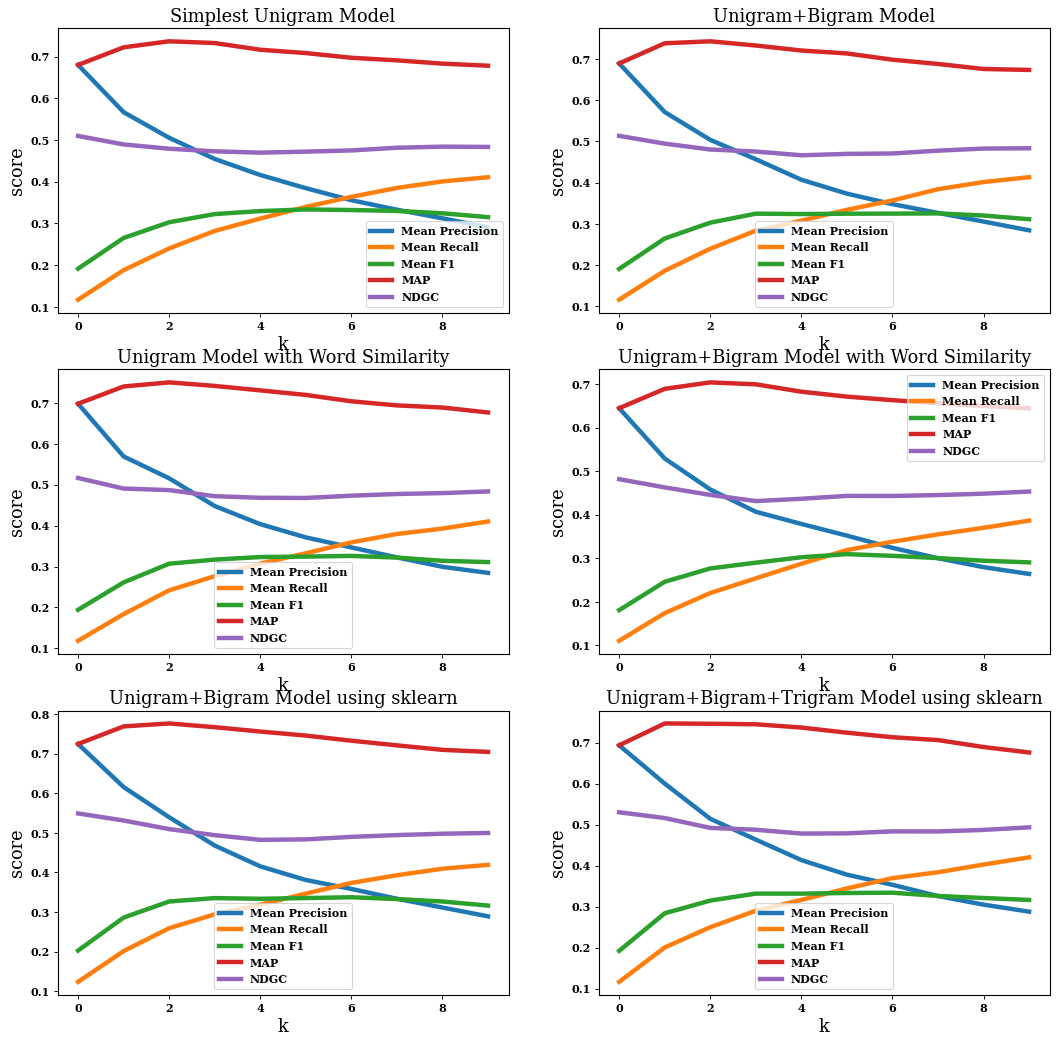

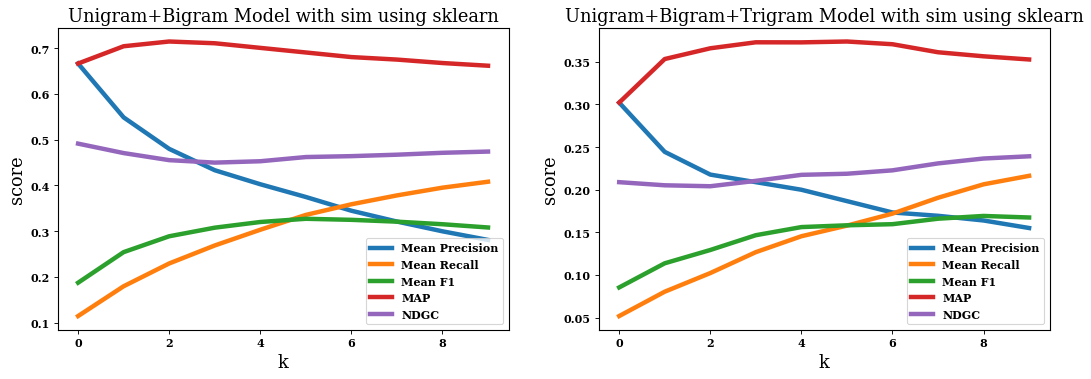

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = "bold"
plt.rcParams['axes.linewidth'] = 1
fsize = 16
k = range(10)
plt.figure(figsize=(16, 16), dpi=80)


plt.subplot(3,2,1)
# plt.figure()
plt.plot(k,unigram_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,unigram_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,unigram_meanF,linewidth=4,label='Mean F1')
plt.plot(k,unigram_meanavgP,linewidth=4,label='MAP')
plt.plot(k,unigram_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Simplest Unigram Model',fontsize=fsize)

# plt.figure()
plt.subplot(3,2,2)
plt.plot(k,bigram_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,bigram_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,bigram_meanF,linewidth=4,label='Mean F1')
plt.plot(k,bigram_meanavgP,linewidth=4,label='MAP')
plt.plot(k,bigram_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram Model',fontsize=fsize)


# plt.figure()
# plt.figure(figsize=(16, 8), dpi=80)
plt.subplot(3,2,3)
plt.plot(k,unigram_meanP_sim,linewidth=4,label='Mean Precision')
plt.plot(k,unigram_meanR_sim,linewidth=4,label='Mean Recall')
plt.plot(k,unigram_meanF_sim,linewidth=4,label='Mean F1')
plt.plot(k,unigram_meanavgP_sim,linewidth=4,label='MAP')
plt.plot(k,unigram_meanN_sim,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram Model with Word Similarity',fontsize=fsize)


# plt.figure()
plt.subplot(3,2,4)
plt.plot(k,bigram_meanP_sim,linewidth=4,label='Mean Precision')
plt.plot(k,bigram_meanR_sim,linewidth=4,label='Mean Recall')
plt.plot(k,bigram_meanF_sim,linewidth=4,label='Mean F1')
plt.plot(k,bigram_meanavgP_sim,linewidth=4,label='MAP')
plt.plot(k,bigram_meanN_sim,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram Model with Word Similarity',fontsize=fsize)


# plt.figure(figsize=(16, 8), dpi=80)
plt.subplot(3,2,5)
plt.plot(k,bigram_package_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,bigram_package_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,bigram_package_meanF,linewidth=4,label='Mean F1')
plt.plot(k,bigram_package_meanavgP,linewidth=4,label='MAP')
plt.plot(k,bigram_package_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram Model using sklearn',fontsize=fsize)


plt.subplot(3,2,6)
plt.plot(k,trigram_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,trigram_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,trigram_meanF,linewidth=4,label='Mean F1')
plt.plot(k,trigram_meanavgP,linewidth=4,label='MAP')
plt.plot(k,trigram_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram+Trigram Model using sklearn',fontsize=fsize)


plt.figure(figsize=(16, 5), dpi=80)
plt.subplot(1,2,1)
# plt.figure()
plt.plot(k,bigram_package_sim_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,bigram_package_sim_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,bigram_package_sim_meanF,linewidth=4,label='Mean F1')
plt.plot(k,bigram_package_sim_meanavgP,linewidth=4,label='MAP')
plt.plot(k,bigram_package_sim_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram Model with sim using sklearn',fontsize=fsize)

plt.subplot(1,2,2)
# plt.figure()
plt.plot(k,trigram_package_sim_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,trigram_package_sim_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,trigram_package_sim_meanF,linewidth=4,label='Mean F1')
plt.plot(k,trigram_package_sim_meanavgP,linewidth=4,label='MAP')
plt.plot(k,trigram_package_sim_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram+Trigram Model with sim using sklearn',fontsize=fsize)


<Figure size 1280x1280 with 0 Axes>

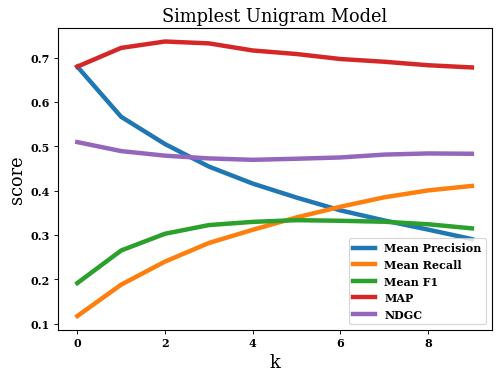

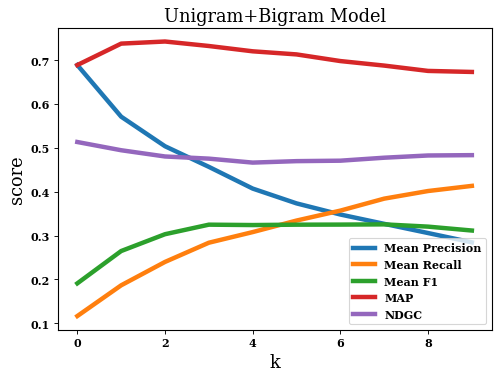

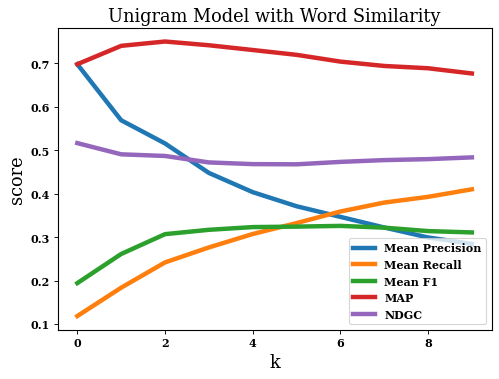

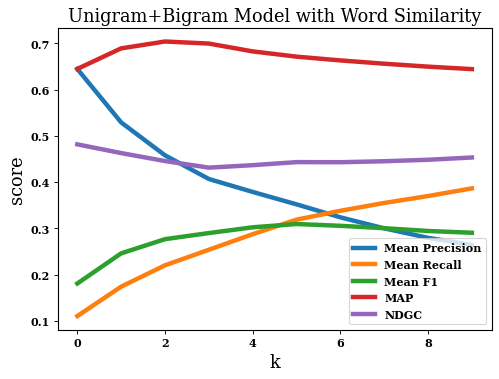

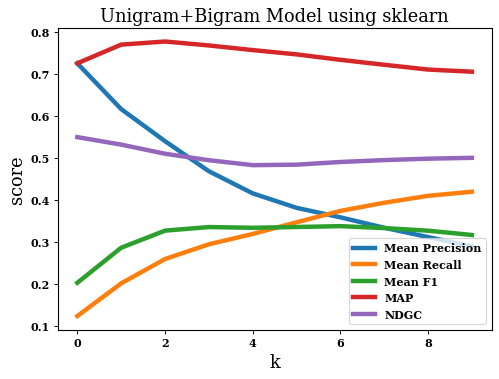

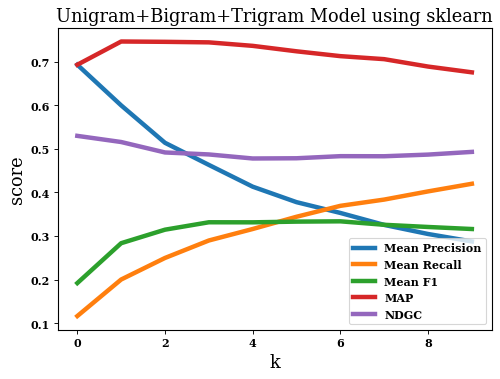

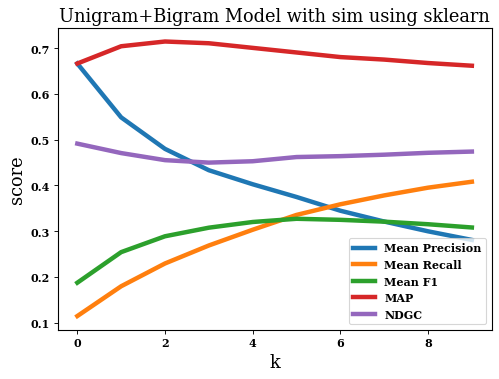

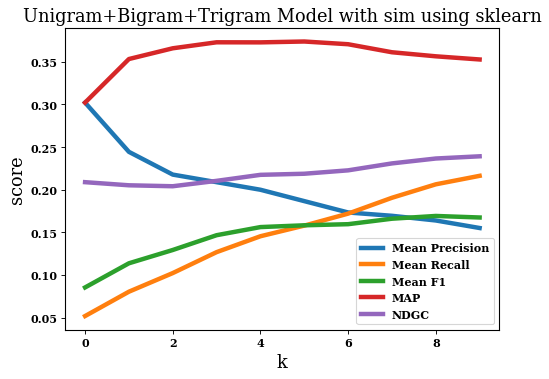

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = "bold"
plt.rcParams['axes.linewidth'] = 1
fsize = 16
k = range(10)
plt.figure(figsize=(16, 16), dpi=80)


# plt.subplot(3,2,1)
plt.figure(figsize=(7, 5), dpi=80)
# plt.figure()
plt.plot(k,unigram_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,unigram_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,unigram_meanF,linewidth=4,label='Mean F1')
plt.plot(k,unigram_meanavgP,linewidth=4,label='MAP')
plt.plot(k,unigram_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Simplest Unigram Model',fontsize=fsize)
plt.savefig('fig1.png')

# plt.figure()
# plt.subplot(3,2,2)
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(k,bigram_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,bigram_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,bigram_meanF,linewidth=4,label='Mean F1')
plt.plot(k,bigram_meanavgP,linewidth=4,label='MAP')
plt.plot(k,bigram_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram Model',fontsize=fsize)
plt.savefig('fig2.png')


# plt.figure()
# plt.figure(figsize=(16, 8), dpi=80)
# plt.subplot(3,2,3)
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(k,unigram_meanP_sim,linewidth=4,label='Mean Precision')
plt.plot(k,unigram_meanR_sim,linewidth=4,label='Mean Recall')
plt.plot(k,unigram_meanF_sim,linewidth=4,label='Mean F1')
plt.plot(k,unigram_meanavgP_sim,linewidth=4,label='MAP')
plt.plot(k,unigram_meanN_sim,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram Model with Word Similarity',fontsize=fsize)
plt.savefig('fig3.png')

# plt.figure()
# plt.subplot(3,2,4)
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(k,bigram_meanP_sim,linewidth=4,label='Mean Precision')
plt.plot(k,bigram_meanR_sim,linewidth=4,label='Mean Recall')
plt.plot(k,bigram_meanF_sim,linewidth=4,label='Mean F1')
plt.plot(k,bigram_meanavgP_sim,linewidth=4,label='MAP')
plt.plot(k,bigram_meanN_sim,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram Model with Word Similarity',fontsize=fsize)
plt.savefig('fig4.png')

# plt.figure(figsize=(16, 8), dpi=80)
# plt.subplot(3,2,5)
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(k,bigram_package_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,bigram_package_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,bigram_package_meanF,linewidth=4,label='Mean F1')
plt.plot(k,bigram_package_meanavgP,linewidth=4,label='MAP')
plt.plot(k,bigram_package_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram Model using sklearn',fontsize=fsize)
plt.savefig('fig5.png')

# plt.subplot(3,2,6)
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(k,trigram_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,trigram_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,trigram_meanF,linewidth=4,label='Mean F1')
plt.plot(k,trigram_meanavgP,linewidth=4,label='MAP')
plt.plot(k,trigram_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram+Trigram Model using sklearn',fontsize=fsize)
plt.savefig('fig6.png')

plt.figure(figsize=(7, 5), dpi=80)
# plt.subplot(1,2,1)
# plt.figure()
plt.plot(k,bigram_package_sim_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,bigram_package_sim_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,bigram_package_sim_meanF,linewidth=4,label='Mean F1')
plt.plot(k,bigram_package_sim_meanavgP,linewidth=4,label='MAP')
plt.plot(k,bigram_package_sim_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram Model with sim using sklearn',fontsize=fsize)
plt.savefig('fig7.png')
# plt.subplot(1,2,2)
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(k,trigram_package_sim_meanP,linewidth=4,label='Mean Precision')
plt.plot(k,trigram_package_sim_meanR,linewidth=4,label='Mean Recall')
plt.plot(k,trigram_package_sim_meanF,linewidth=4,label='Mean F1')
plt.plot(k,trigram_package_sim_meanavgP,linewidth=4,label='MAP')
plt.plot(k,trigram_package_sim_meanN,linewidth=4,label='NDGC')
plt.xlabel('k',fontsize=fsize)
plt.ylabel('score',fontsize=fsize)
plt.legend()
plt.title('Unigram+Bigram+Trigram Model with sim using sklearn',fontsize=fsize)
plt.savefig('fig8.png')